# Ejercicio 1

In [436]:
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Visualización del Modelo de Regresión Lineal y la función de error cuadrático medio

Funciones auxiliares (solo ejecutar, y seguir más abajo)

In [437]:
def visualizar_superficie_error(ax_surface,x,y,m,b,mean_error):
    ax_surface.set_xlabel("m")
    ax_surface.set_ylabel("b")
    ax_surface.set_zlabel("E")
    ax_surface.set_title("Superficie de E(m,b) ")
    ax_surface.set_zticks([])
    detail=0.01
    param_range=12
    M = np.arange(-param_range, param_range, detail)
    B = np.arange(-param_range, param_range, detail)
    Ms, Bs = np.meshgrid(M, B)
    E=np.zeros_like(Ms)
    n=len(x)
    for i in range(n):
        Yi=Ms*x[i]+Bs
        E+=(Yi-y[i])**2
    E/=n
    surf = ax_surface.plot_surface(Ms,Bs,E, cmap=cm.coolwarm,alpha=0.5,linewidth=0, antialiased=False)
    ax_surface.scatter([m],[b],[mean_error*1.1],c="green",s=80)
    plt.colorbar(surf, shrink=0.5, aspect=6)    
    
def visualizar_leyendas(ax_data,m,b,mean_error,new_x,new_y):
    model = patches.Patch(color='red', label='Modelo: y=x*{:.2f}+{:.2f}'.format(m,b))
    data = patches.Patch(color='blue', label='Datos')
    handles=[model,data]
    label='$E = \\frac{1}{n}  \sum_i^n E_i = $  %.2f' % (mean_error)
    error_patch = patches.Patch(color='black', label=label)
    handles.append(error_patch)
    if ver_nuevo_dato:
        new_patch = patches.Patch(color='green', label='Nuevo dato: x={:.2f}, y={:.2f}'.format(new_x,new_y))
        handles.append(new_patch)
        
    ax_data.legend(handles=handles,fontsize=8)
    
def visualizar_residuales(ax_data,x,y,y_predicted):
    text_pad=0.5
    for x,y,yp,i in zip(x,y,y_predicted,range(len(x))):
        ax_data.vlines(x, y,yp, colors='black')
        error=(y-yp)**2
        if abs(error)>0.1:
            if yp>y:
                text_y=y-0.7
            else:
                text_y=y+0.4
            residual_label="$E_{{ {} }}=${:.2f}".format(i,error)
            ax_data.text(x-2,text_y,residual_label,size=7)
            
def visualizar(x,y,m,b,y_predicted,errors,mean_error,new_x,new_y,ver_residuos,ver_nuevo_dato):
    # Visualizacion
    figure=plt.figure(figsize=(15, 5),dpi=150)
    ax_data=figure.add_subplot(1,2,1)
    ax_surface=figure.add_subplot(1,2,2,projection='3d')
    
    #dibujar datos
    ax_data.scatter(x,y,color="blue")
    if ver_nuevo_dato:
        ax_data.scatter(new_x,new_y,color="green",s=60)
    #Etiquetas y titulos
    ax_data.set_xlabel("x (Horas estudiadas)")
    ax_data.set_ylabel("y (Nota)")
    ax_data.set_title("Horas estudiadas vs Nota")
    
    #Dibujar linea mx+b
    x_pad=0.2
    min_x,max_x=x.min(),x.max()
    min_x = min_x - abs(min_x)*0.1
    max_x = max_x + abs(max_x)*0.1
    ax_data.plot([min_x,max_x],[min_x*m+b,max_x*m+b],color="red")
    if ver_residuos:
        # Mostrar residuales (distancia entre el y verdadero y el predicho)
        visualizar_residuales(ax_data,x,y,y_predicted)
    # Mostrar leyendas
    visualizar_leyendas(ax_data,m,b,mean_error,new_x,new_y)

    
    visualizar_superficie_error(ax_surface,x,y,m,b,mean_error)
    
    plt.show()

# Visualización del modelo y la superficie del error

El siguiente código carga un conjunto de datos, y luego crea un modelo de regresión lineal para predecir los valores de salida `y` en base a los de entrada `x` en base a la función `y=mx+b`.

Probá modificando los parámetros `m` y `b` del modelo, tratando de minimizar *a mano* el error. 

Observá como cambia la recta `mx+b` y qué tan bien se ajusta a los datos (izquierda) y al mismo tiempo cambia la posición de los parámetros en la función de error (bola verde/turquesa en la figura de la derecha).  

Notá que la forma de la superficie del error (un paraboloide) no cambia al modificar los parámetros (derecha). Lo que si cambia es la posición de los mismos en el espacio de todas las posibles combinaciones de `m` y `b`.


Luego de eso, En NORMALIZACION normalizá los datos de entrada `x` restándoles la media μ y dividiendo por la desviación estándar σ con la fórmula `x ← (x-μ)/σ`. Recordá que `x` es un vector de NumPy y por ende soporta los métodos `mean()` y `std()`. 



Responda:
* ¿Cambia la superficie de la función de error resultante al normalizar?
   * **RE**: Si parece cambiar a una forma ma convexa.
* ¿Cuando baja el error? ¿Puede ser 0?
   * **RE**: Baja el error pero no peude ser cero, yaue existen reciduos que no lo permite.
* ¿Qué me dice el modelo respecto a la nota que obtienen los alumnos que no estudiaron nada? (para un b fijo)
   * **RE**:Comando el modelo sin normalizacion el cual es interpletable, o mas interpletable a diferencia del modelo co normalizacion. Si el estudioante no estudia nada, es decir 0 horas la nota es de -0.895 puntos, lo cual podriamos tomar como 0 puntos.
* ¿Cuánto puedo esperar que aumente mi nota por cada hora de estudio?
  * **RE**: Por cada hora que agrego de estudio la nota del examen aumenta 0.35835 puntos.
* ¿Cuando es más fácil la materia? (en relación a m)
  * **RE**: Si El valor de la pendiente m aumenta, con las misma hora de estudio puedo obtener una nota mas alta. Si disminuye, con las mismas horas de estudio obtengo una nota mas baja.  

## Carga de datos

In [438]:
dataset_base = ""
dataset      = "study_regression_small.csv"
# dataset="anscombe4.csv"

dataset_path = os.path.join(dataset_base,dataset)
data         = np.loadtxt(open(dataset_path, "rb"), delimiter=",", skiprows=1)
x,y          = data[:,0], data[:,1]

NORMALIZAR

In [439]:
x_ori  = x
x_norm = (x - x.mean())/ x.std()

Parámetros del modelo (probar valores entre -0 y 10)

In [624]:
m_ori = 0.35835
b_ori = -0.895

m_norm = 2
b_norm = 6.005

Cálculo de la salida o predicción del modelo para todos los ejemplos

In [625]:
y_predicted_ori  = x_ori  * m_ori  + b_ori
y_predicted_norm = x_norm * m_norm + b_norm

Calculo del error del modelo

In [626]:
def get_mean_error(y, y_predicted): return ((y - y_predicted) ** 2).mean()

In [627]:
mean_error_ori  = get_mean_error(y, y_predicted_ori)
mean_error_norm = get_mean_error(y, y_predicted_norm)

mean_error_ori, mean_error_norm

(6.128952335373685, 1.3644902969567376)

Dato nuevo a evaluar

In [628]:
new_x = 1
new_y = new_x * m + b

Opciones de visualización (deshabilitar para ver mejor los datos)

In [629]:
ver_residuos   = True
ver_nuevo_dato = True

Visualizar todo

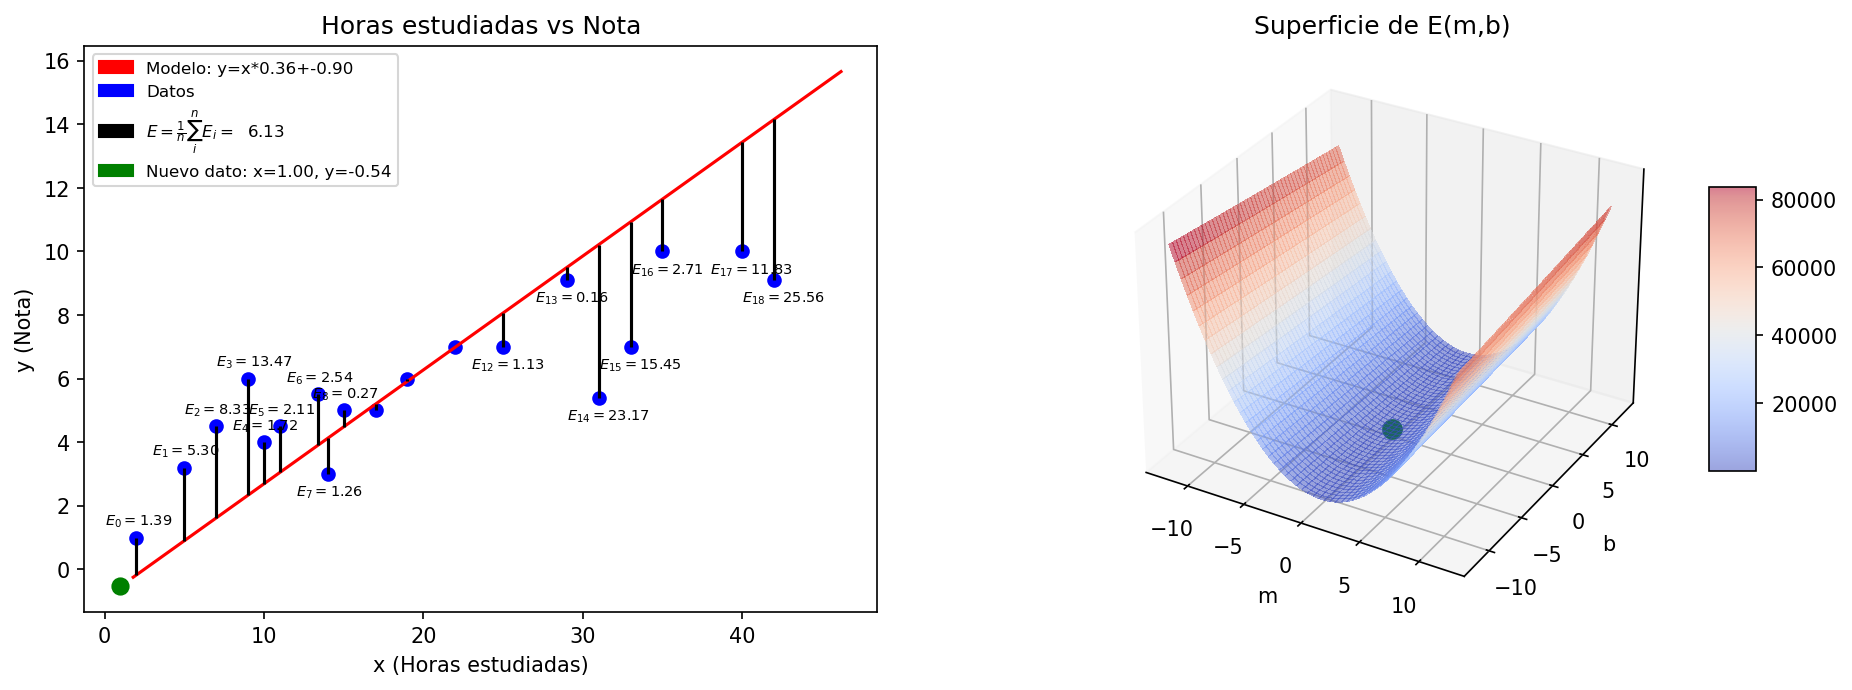

In [630]:
visualizar(x_ori, y, m_ori, b_ori, y_predicted_ori, errors, mean_error_ori, new_x, new_y, ver_residuos, ver_nuevo_dato)

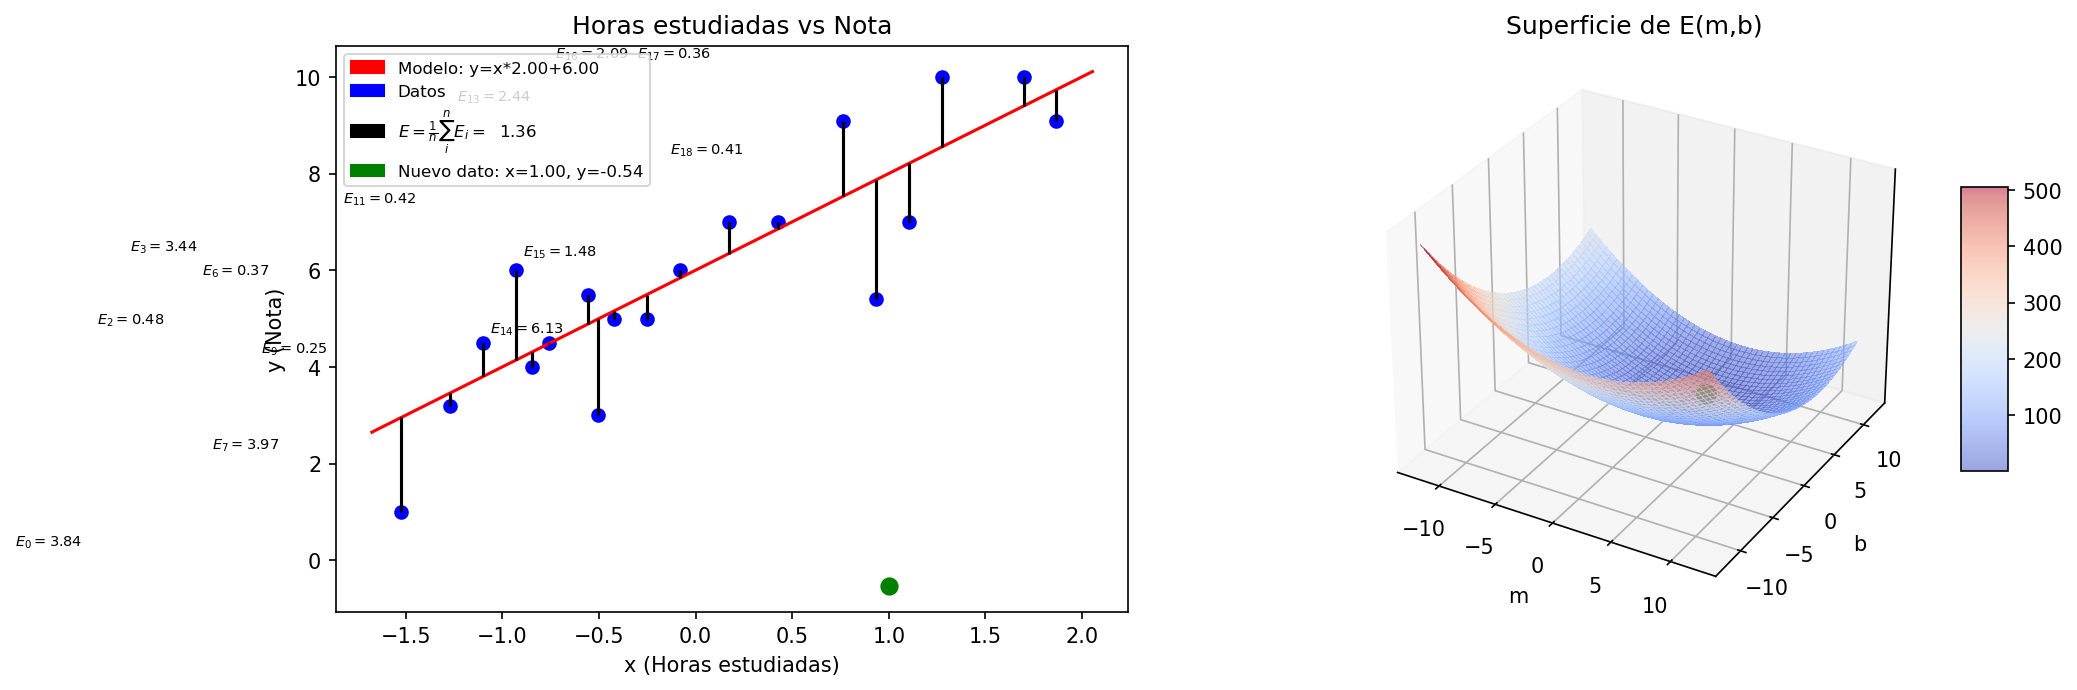

In [631]:
visualizar(x_norm, y, m_norm, b_norm, y_predicted_norm, errors, mean_error_norm, new_x, new_y, ver_residuos, ver_nuevo_dato)